# **<center>Solar Panel Fault Detection</center>**

## **Preliminary Analysis and overview of Solar Panel Image Data Set**

---



In [1]:
import kagglehub

path = kagglehub.dataset_download("kiyoshi732/faulty-solar-panel-images")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/kiyoshi732/faulty-solar-panel-images/versions/1


In [2]:
data_path = "/root/.cache/kagglehub/datasets/kiyoshi732/faulty-solar-panel-images/versions/1/Faulty_solar_panel"

In [26]:
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
from glob import glob

In [4]:
images = glob(os.path.join(data_path ,"**/*.jpg"), recursive = True)

In [5]:
len(images)

4283

In [13]:
class_names = os.listdir(data_path)

In [14]:
class_names

['Snow-Covered',
 'Dusty',
 'Clean',
 'Bird-drop',
 'Physical-Damage',
 'Electrical-damage']

In [18]:
row = 2
col = 3

In [30]:
from genericpath import isdir

folder_data = []

for folder in os.listdir(data_path):
  folder_path = os.path.join(data_path, folder)
  if os.path.isdir(folder_path):
    image_count = len(os.listdir(folder_path))
    folder_data.append({"Folder Name": folder, "Image Count":image_count})

In [31]:
df_images_count = pd.DataFrame(folder_data)

In [32]:
df_images_count

Folder Name  Image Count
0       Snow-Covered          424
1              Dusty          651
2              Clean          948
3          Bird-drop          683
4    Physical-Damage         1341
5  Electrical-damage          318

Text(0, 0.5, 'Image Count')

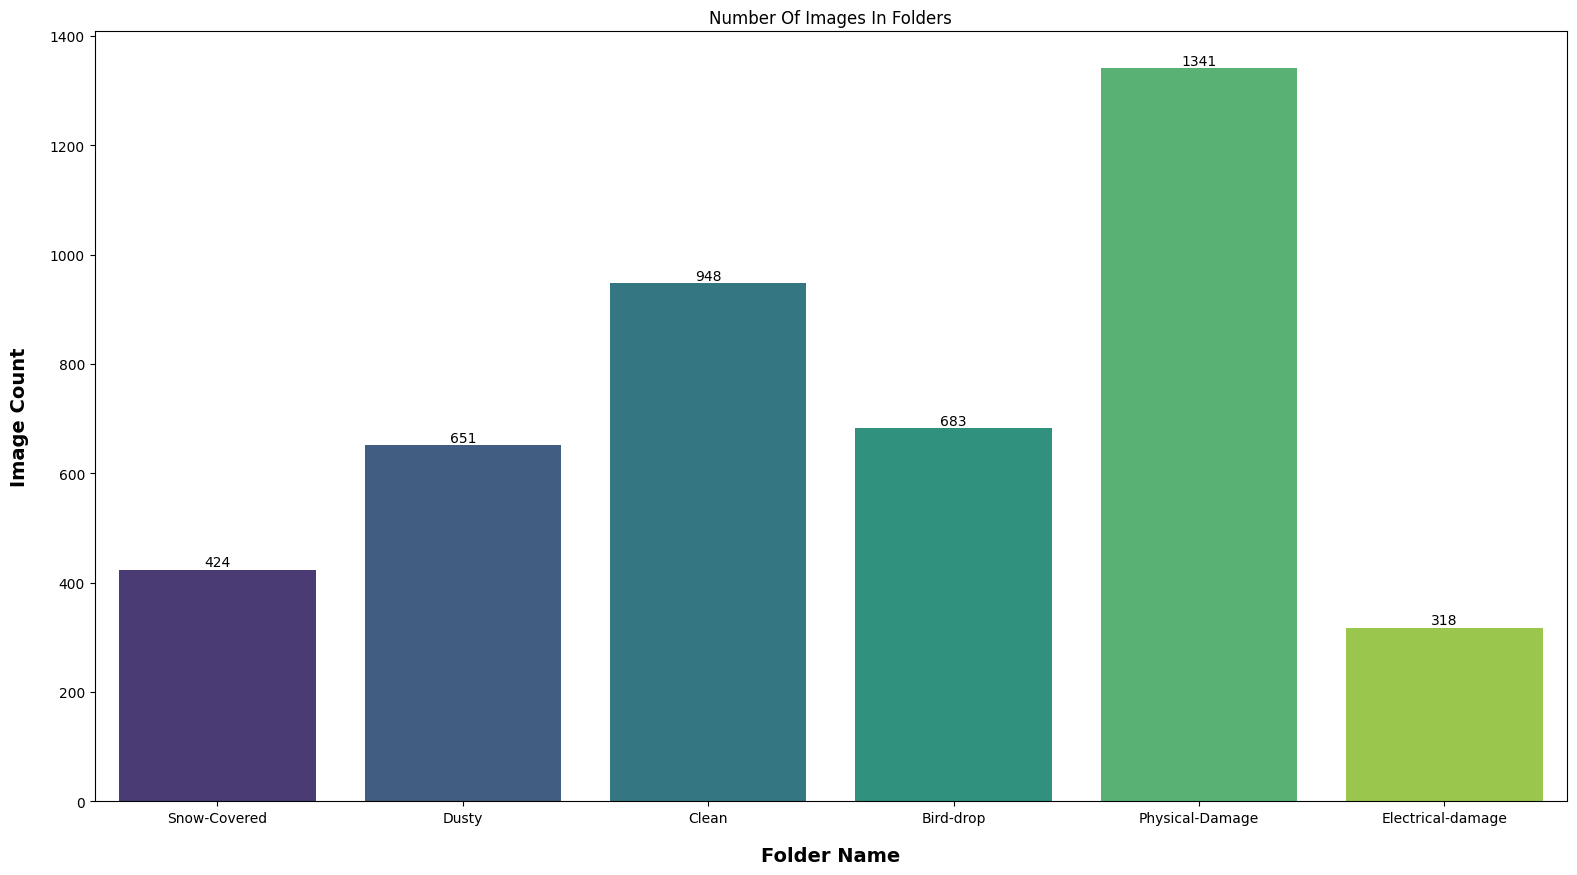

In [33]:
# @title Distribution of Image Counts per Class
plt.figure(figsize=(19,10))

ax = sns.barplot(df_images_count, x = "Folder Name", y = "Image Count", estimator = "sum", palette ="viridis", hue = "Folder Name")
plt.title("Number Of Images In Folders")

for container in ax.containers:
  ax.bar_label(container, fontsize = 10)

plt.xlabel("Folder Name", fontsize =14, fontweight = "bold", labelpad = 15)
plt.ylabel("Image Count", fontsize =14, fontweight = "bold", labelpad = 15)

In [52]:
img_sizes = []
img_classes = []

for img_path in images:
    img = cv2.imread(img_path)
    if img is not None:
      height, width = img.shape[:2]
      img_sizes.append((width, height))

      class_name = img_path.split("/")[-2]
      img_classes.append(class_name)

df_sizes = pd.DataFrame(img_sizes, columns=["Width", "Height"])
df_sizes["Class"] = img_classes

In [53]:
df_sizes

Width  Height              Class
0       224     100       Snow-Covered
1       224     168       Snow-Covered
2       224     161       Snow-Covered
3       224     168       Snow-Covered
4       224     167       Snow-Covered
...     ...     ...                ...
4278    224     160  Electrical-damage
4279    474     266  Electrical-damage
4280    474     266  Electrical-damage
4281    224     136  Electrical-damage
4282    224     157  Electrical-damage

[4283 rows x 3 columns]

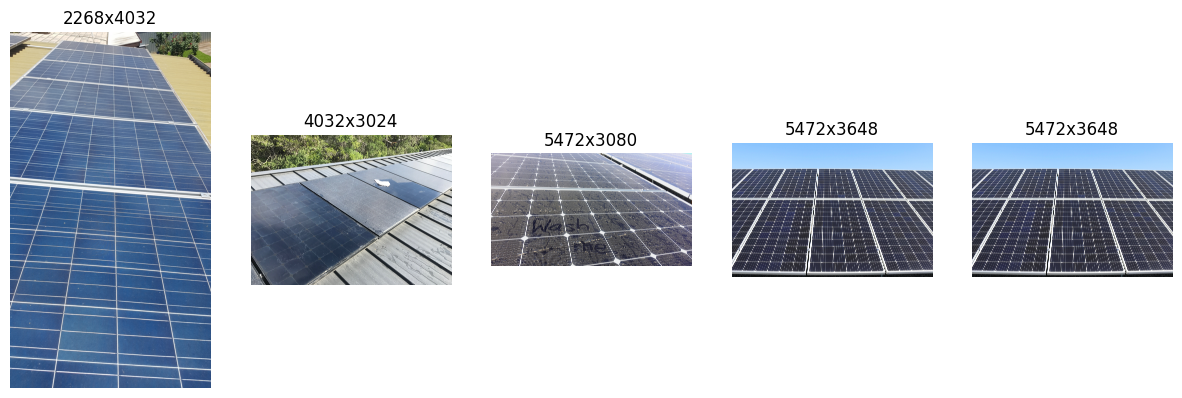

In [60]:
# @title Visualization of Outlier Image Resolutions
fig, axs = plt.subplots(1, min(len(large_images), 5), figsize=(15, 5))

for i, (img_path, width, height) in enumerate(large_images[:5]):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    axs[i].imshow(img)
    axs[i].set_title(f"{width}x{height}")
    axs[i].axis("off")

plt.show()

# **Image Distribution Analysis**

---



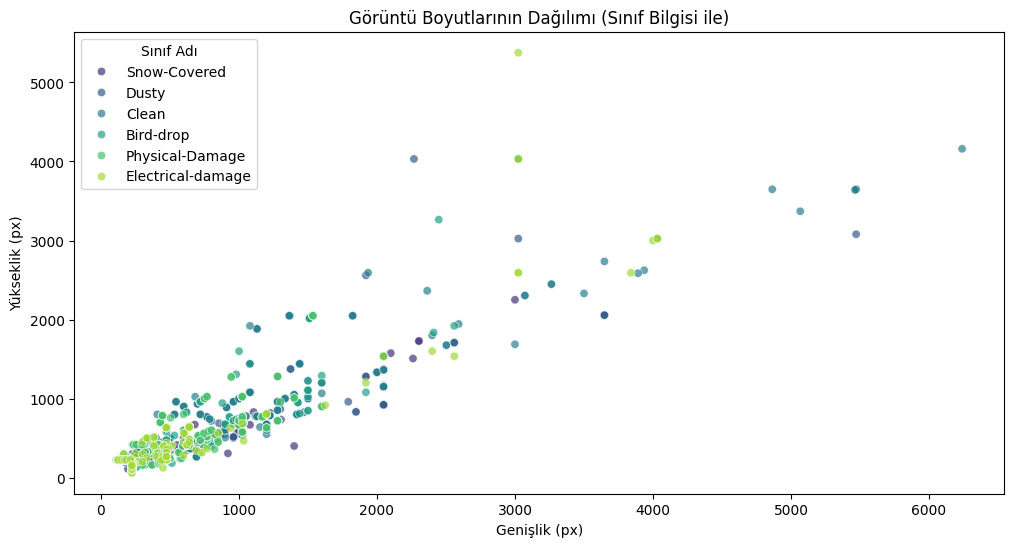

In [54]:
# @title Distribution of Image Sizes by Class
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_sizes, x="Width", y="Height", hue="Class", palette="viridis", alpha=0.7)

plt.title("Görüntü Boyutlarının Dağılımı (Sınıf Bilgisi ile)")
plt.xlabel("Genişlik (px)")
plt.ylabel("Yükseklik (px)")
plt.legend(title="Sınıf Adı")
plt.show()

In [59]:
large_images = []

for img_path in images:
    img = cv2.imread(img_path)
    if img is not None:
        height, width = img.shape[:2]
        if width > 4000 or height > 4000:
            large_images.append((img_path, width, height))

df_large = pd.DataFrame(large_images, columns=["Image Path", "Width", "Height"])

                                           Image Path  Width  Height
0   /root/.cache/kagglehub/datasets/kiyoshi732/fau...   2268    4032
1   /root/.cache/kagglehub/datasets/kiyoshi732/fau...   4032    3024
2   /root/.cache/kagglehub/datasets/kiyoshi732/fau...   5472    3080
3   /root/.cache/kagglehub/datasets/kiyoshi732/fau...   5472    3648
4   /root/.cache/kagglehub/datasets/kiyoshi732/fau...   5472    3648
5   /root/.cache/kagglehub/datasets/kiyoshi732/fau...   6240    4160
6   /root/.cache/kagglehub/datasets/kiyoshi732/fau...   5472    3648
7   /root/.cache/kagglehub/datasets/kiyoshi732/fau...   5067    3370
8   /root/.cache/kagglehub/datasets/kiyoshi732/fau...   4864    3648
9   /root/.cache/kagglehub/datasets/kiyoshi732/fau...   5464    3640
10  /root/.cache/kagglehub/datasets/kiyoshi732/fau...   3024    4032
11  /root/.cache/kagglehub/datasets/kiyoshi732/fau...   3024    4032
12  /root/.cache/kagglehub/datasets/kiyoshi732/fau...   4032    3024
13  /root/.cache/kagglehub/dataset

In [61]:
df_large

Image Path  Width  Height
0   /root/.cache/kagglehub/datasets/kiyoshi732/fau...   2268    4032
1   /root/.cache/kagglehub/datasets/kiyoshi732/fau...   4032    3024
2   /root/.cache/kagglehub/datasets/kiyoshi732/fau...   5472    3080
3   /root/.cache/kagglehub/datasets/kiyoshi732/fau...   5472    3648
4   /root/.cache/kagglehub/datasets/kiyoshi732/fau...   5472    3648
5   /root/.cache/kagglehub/datasets/kiyoshi732/fau...   6240    4160
6   /root/.cache/kagglehub/datasets/kiyoshi732/fau...   5472    3648
7   /root/.cache/kagglehub/datasets/kiyoshi732/fau...   5067    3370
8   /root/.cache/kagglehub/datasets/kiyoshi732/fau...   4864    3648
9   /root/.cache/kagglehub/datasets/kiyoshi732/fau...   5464    3640
10  /root/.cache/kagglehub/datasets/kiyoshi732/fau...   3024    4032
11  /root/.cache/kagglehub/datasets/kiyoshi732/fau...   3024    4032
12  /root/.cache/kagglehub/datasets/kiyoshi732/fau...   4032    3024
13  /root/.cache/kagglehub/datasets/kiyoshi732/fau...   3024    4032
14  /root/.cache/kagglehub/datasets/kiyoshi732/fau...   4032    3024
15  /root/.cache/kagglehub/datasets/kiyoshi732/fau...   3024    5376

In [63]:
df_large.shape[0]

16

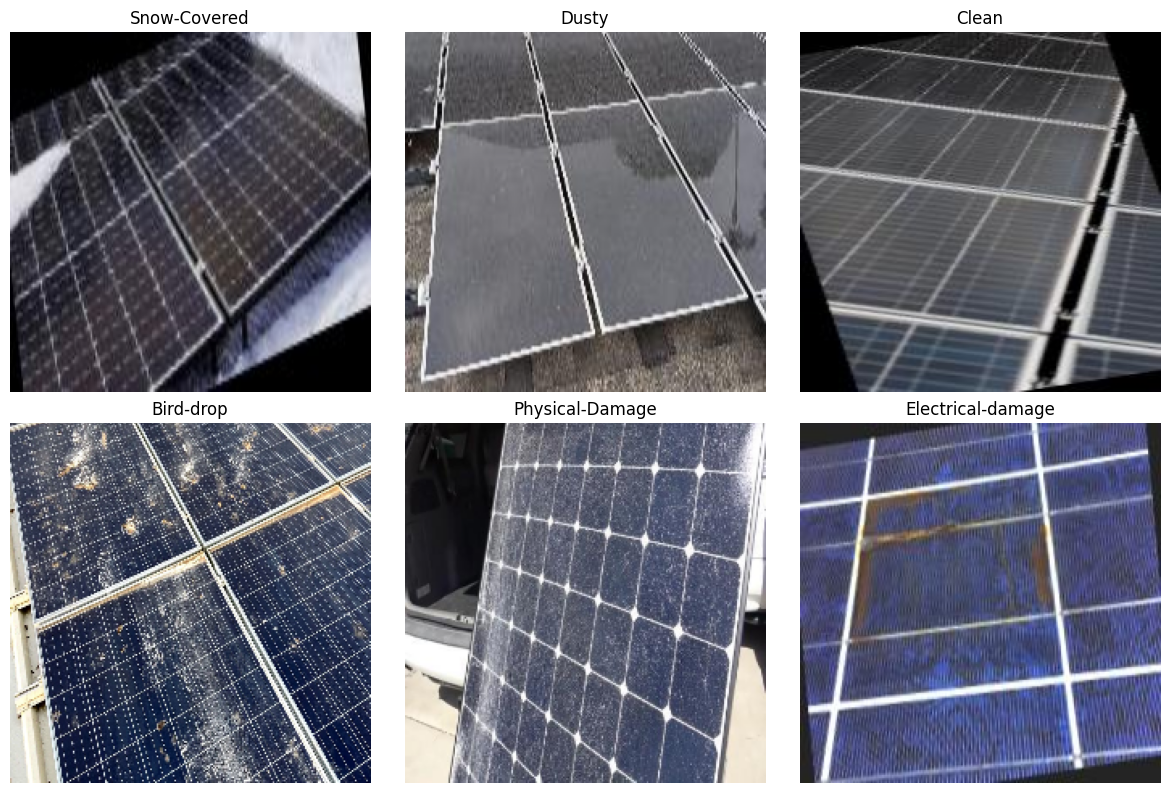

In [20]:
# @title Sample Images for Different Defect Types
fig, axs = plt.subplots(row, col, figsize=(12, 8))
axs = axs.flatten()

for i, cls in enumerate(class_names):
    img_paths = glob(os.path.join(data_path, cls, "*.*"))

    if len(img_paths) > 0:
        img = cv2.imread(img_paths[0])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))
        axs[i].imshow(img)
    else:
        axs[i].imshow(np.ones((224, 224, 3)), cmap="gray")
        axs[i].text(50, 112, "Görüntü Yok", fontsize=12, ha="center", va="center", color="red")

    axs[i].set_title(cls)
    axs[i].axis("off")

plt.tight_layout()
plt.show()

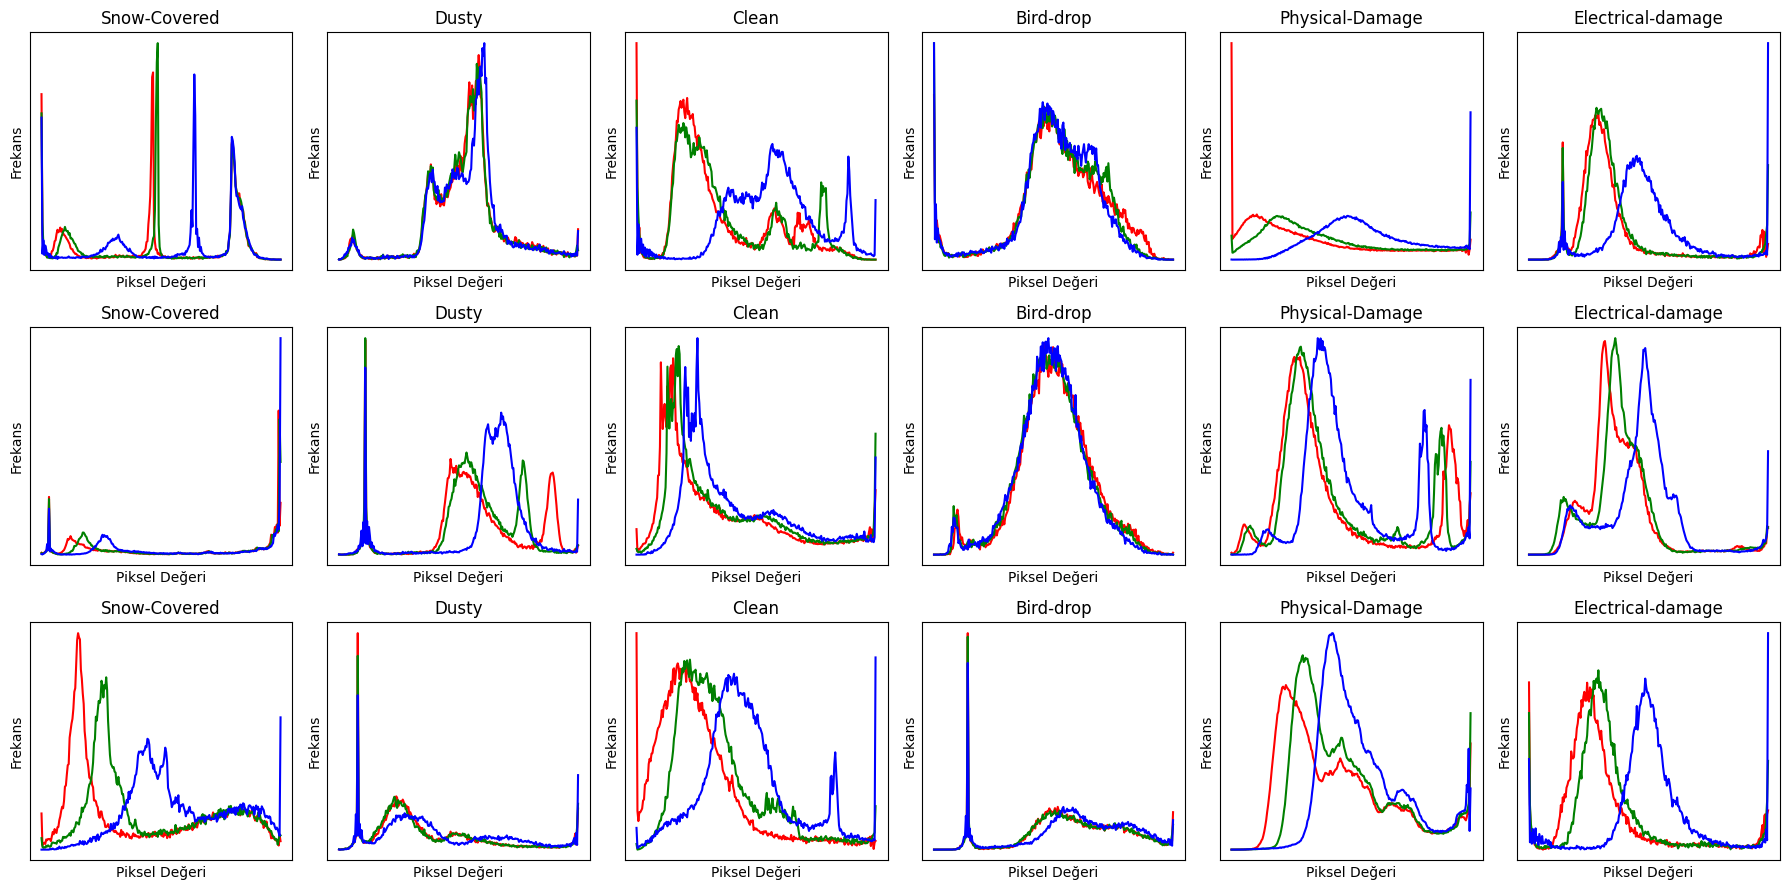

In [78]:
# @title RGB Histograms of Selected Images
import random

selected_images_per_class = {}
images_per_class = 3

for cls in class_names:
    img_paths = glob(os.path.join(data_path, cls, "*.jpg"))

    if len(img_paths) >= images_per_class:
        selected_images_per_class[cls] = random.sample(img_paths, images_per_class)
    elif len(img_paths) > 0:
        selected_images_per_class[cls] = img_paths
    else:
        selected_images_per_class[cls] = []

fig, axs = plt.subplots(3, 6, figsize=(18, 9))
axs = axs.T
axs = axs.flatten()

def plot_color_histogram(image_path, ax):
    if image_path is None:
        ax.axis("off")
        return

    img = cv2.imread(image_path)
    if img is None:
        ax.set_title("Hatalı Görsel")
        ax.axis("off")
        return

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    colors = ('r', 'g', 'b')
    for i, color in enumerate(colors):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        ax.plot(hist, color=color)

    ax.set_title(image_path.split('/')[-2])
    ax.set_xlabel("Piksel Değeri")
    ax.set_ylabel("Frekans")
    ax.set_xticks([])
    ax.set_yticks([])

index = 0
for cls in class_names:
    for img_path in selected_images_per_class.get(cls, []):
        plot_color_histogram(img_path, axs[index])
        index += 1

plt.tight_layout()
plt.show()

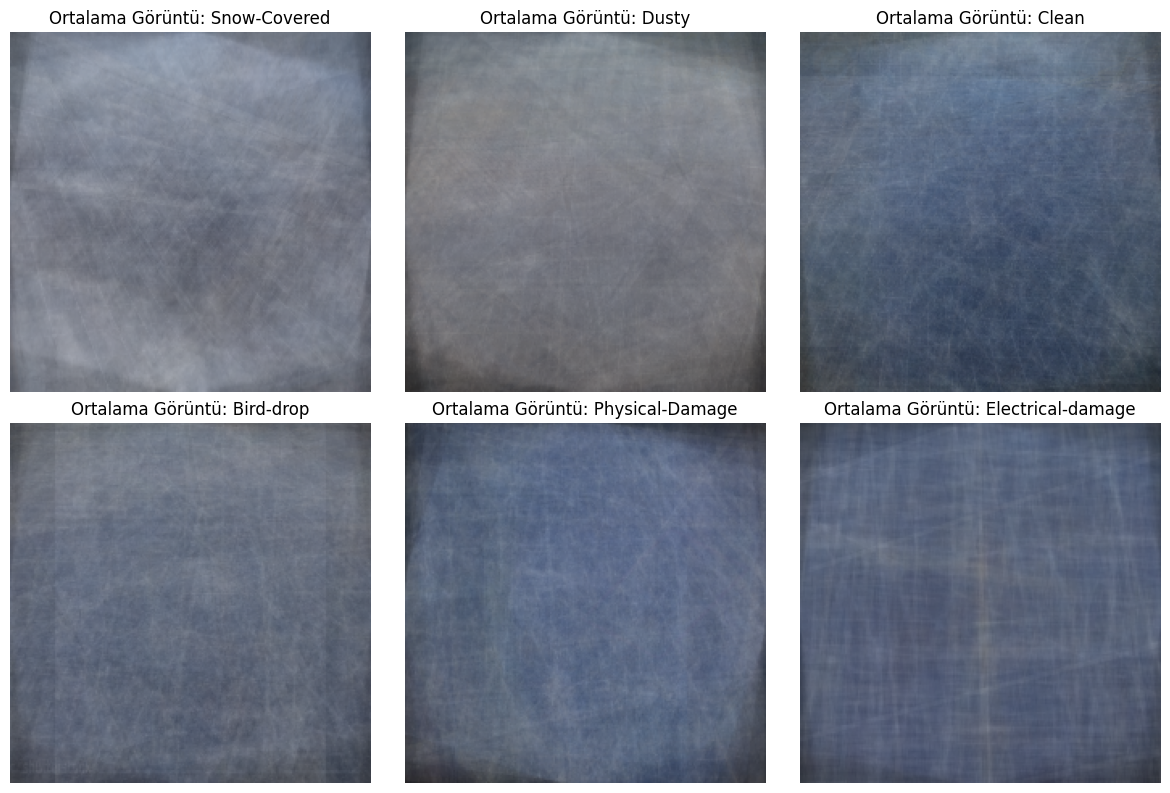

In [41]:
# @title Class-Wise Mean Pixel Value Representations
def compute_average_image(image_paths):
    images = [cv2.imread(img_path) for img_path in image_paths[:50]]
    images = [cv2.resize(img, (224, 224)) for img in images]
    avg_image = np.mean(images, axis=0).astype(np.uint8)
    return avg_image

fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.flatten()

for i, cls in enumerate(class_names):
    img_paths = glob(os.path.join(data_path, cls, "*.jpg"))
    if len(img_paths) > 0:
        avg_img = compute_average_image(img_paths)
        axs[i].imshow(cv2.cvtColor(avg_img, cv2.COLOR_BGR2RGB))
        axs[i].set_title(f"Ortalama Görüntü: {cls}")
        axs[i].axis("off")

plt.tight_layout()
plt.show()

# **Brightness & Contrast Analysis**

---



<ipython-input-100-42dbeaccc600>:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Sınıf Adı")


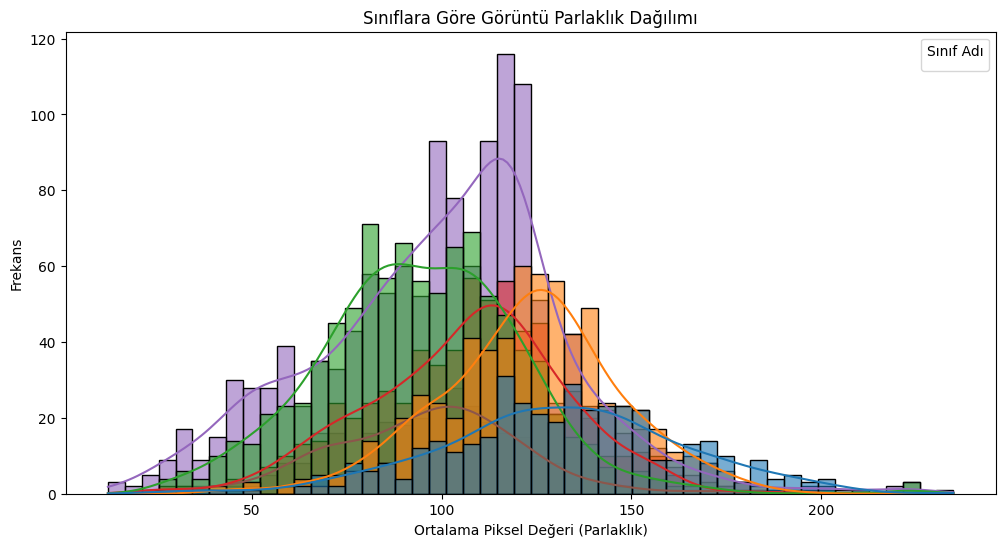

In [100]:
# @title Brightness Distribution Across Different Defect Types
brightness_data = {}

for cls in class_names:
    img_paths = glob(os.path.join(data_path, cls, "*.jpg"))

    if len(img_paths) > 0:
        brightness_values = []

        for img_path in img_paths:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            brightness_values.append(img.mean())

        brightness_data[cls] = brightness_values

df_brightness = pd.DataFrame(
    [(cls, b) for cls, values in brightness_data.items() for b in values],
    columns=["Class", "Brightness"]
)

plt.figure(figsize=(12, 6))
sns.histplot(data=df_brightness, x="Brightness", hue="Class", bins=50, kde=True, palette="tab10", alpha=0.6)

plt.title("Sınıflara Göre Görüntü Parlaklık Dağılımı")
plt.xlabel("Ortalama Piksel Değeri (Parlaklık)")
plt.ylabel("Frekans")
plt.legend(title="Sınıf Adı")
plt.show()

<ipython-input-102-8dc577d93b58>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_contrast, x="Class", y="Contrast", palette="tab10")


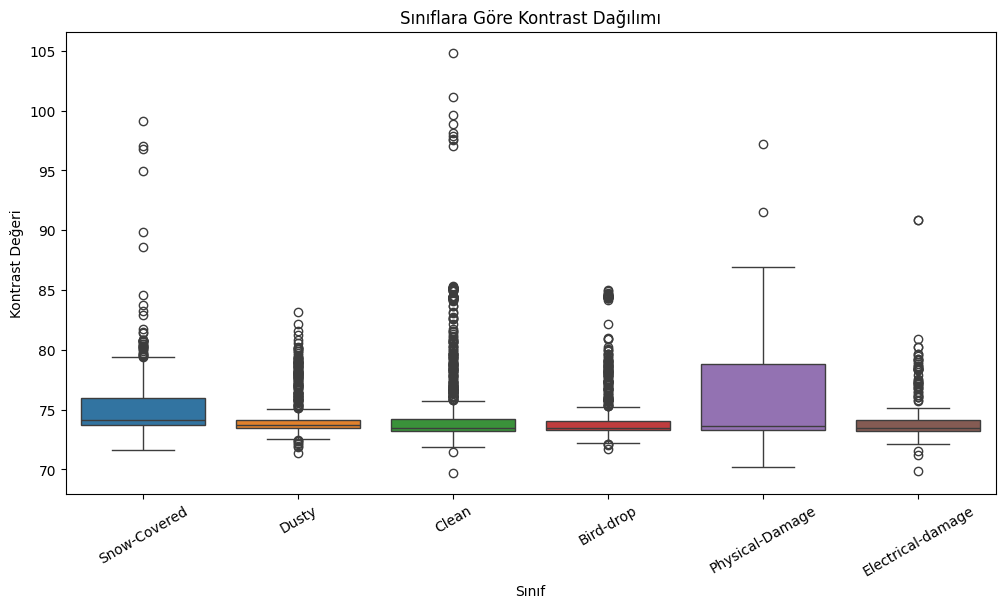

In [102]:
# @title Comparison of Contrast Values Across Classes
contrast_features = []

for img_path in images:
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    img_eq = cv2.equalizeHist(img)
    contrast_value = np.std(img_eq)

    class_name = img_path.split("/")[-2]
    contrast_features.append([class_name, contrast_value])

df_contrast = pd.DataFrame(contrast_features, columns=["Class", "Contrast"])

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_contrast, x="Class", y="Contrast", palette="tab10")
plt.title("Sınıflara Göre Kontrast Dağılımı")
plt.xlabel("Sınıf")
plt.ylabel("Kontrast Değeri")
plt.xticks(rotation=30)
plt.show()

# **Texture & Edge Features**

---



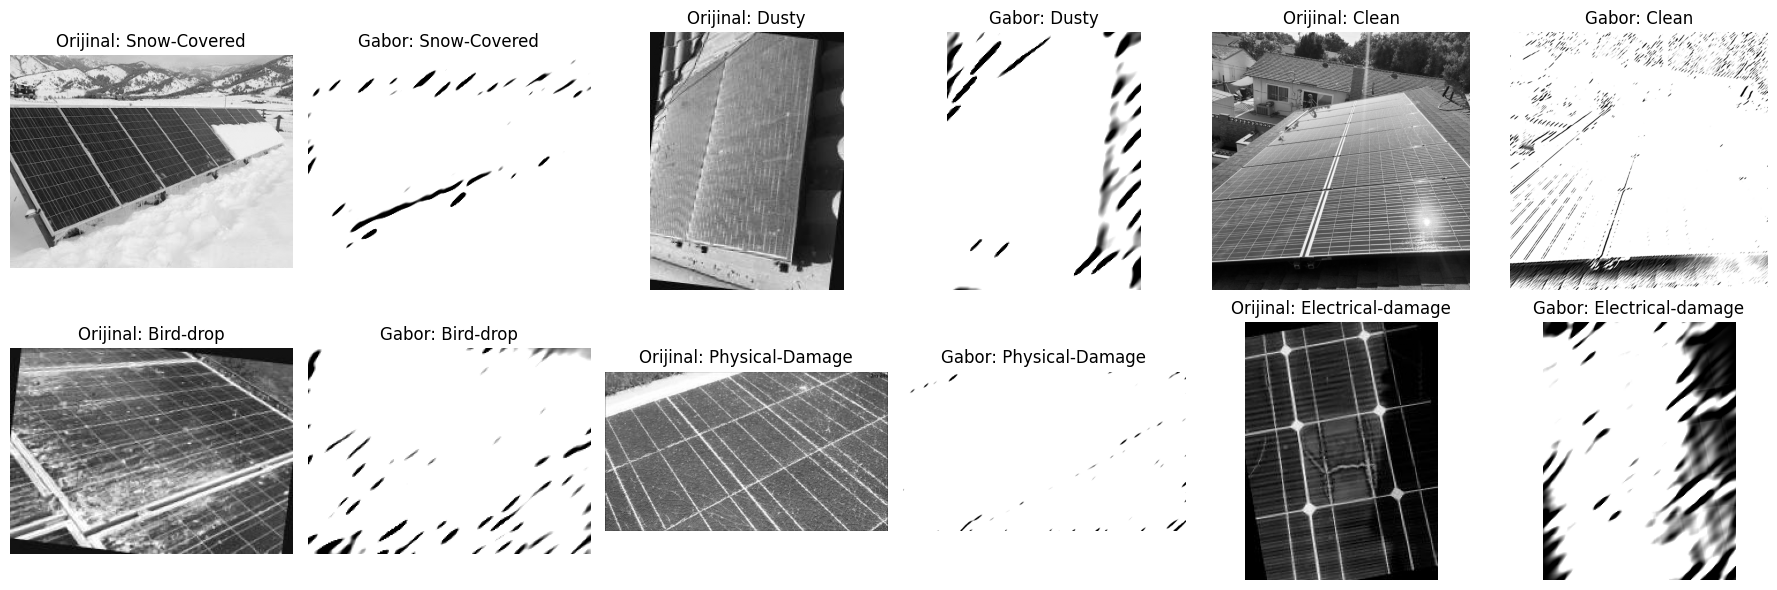

In [84]:
# @title Extracting Texture Features Using Gabor Filter
def apply_gabor_filter(img, ksize=31, sigma=4.0, theta=np.pi/4, lambd=10.0, gamma=0.5, psi=0):
    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi, ktype=cv2.CV_32F)
    filtered_img = cv2.filter2D(img, cv2.CV_8UC3, kernel)
    return filtered_img

selected_images = {}
for cls in class_names:
    img_paths = glob(os.path.join(data_path, cls, "*.jpg"))
    if img_paths:
        selected_images[cls] = random.choice(img_paths)

fig, axs = plt.subplots(2, 6, figsize=(18, 6))
axs = axs.flatten()

for i, (cls, img_path) in enumerate(selected_images.items()):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    gabor = apply_gabor_filter(img)

    axs[i * 2].imshow(img, cmap='gray')
    axs[i * 2].set_title(f"Orijinal: {cls}")
    axs[i * 2].axis("off")

    axs[i * 2 + 1].imshow(gabor, cmap='gray')
    axs[i * 2 + 1].set_title(f"Gabor: {cls}")
    axs[i * 2 + 1].axis("off")

plt.tight_layout()
plt.show()

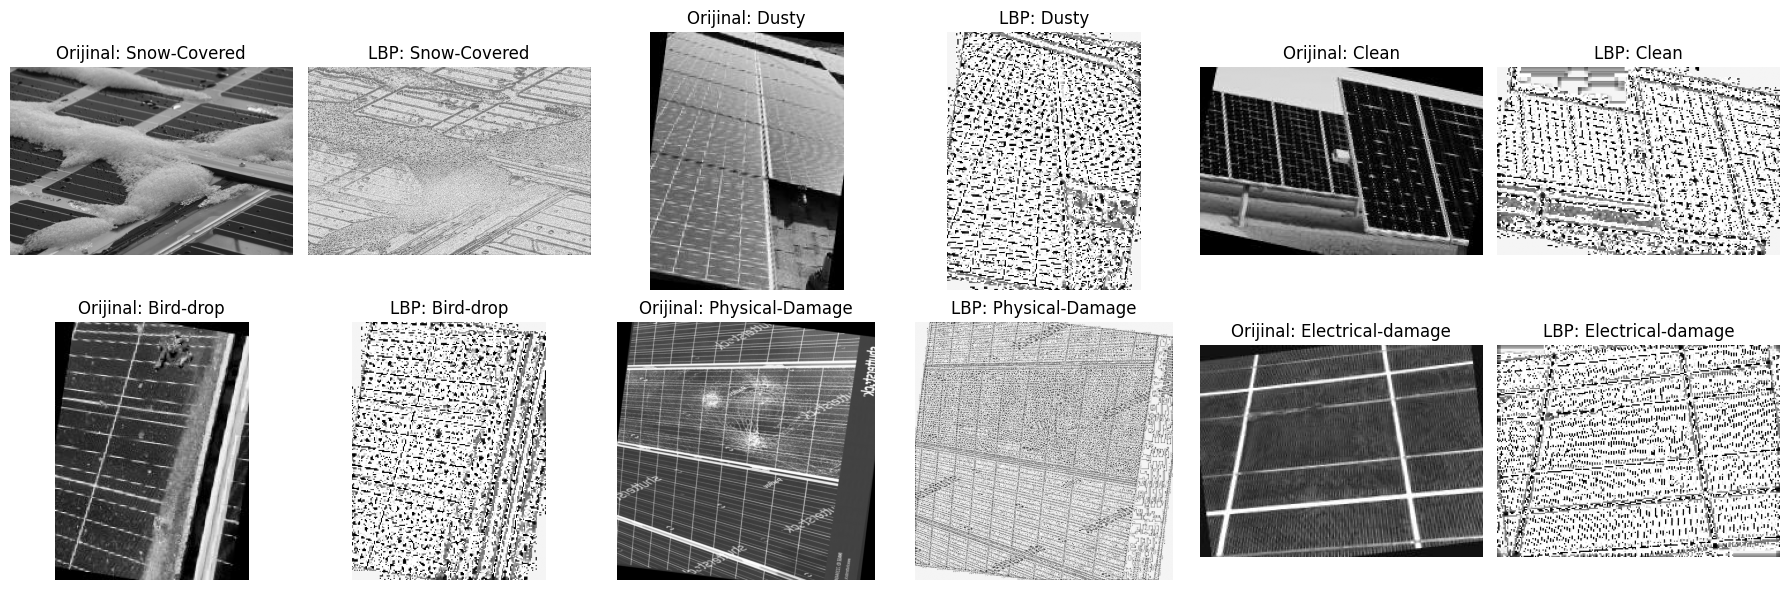

In [82]:
# @title Extracting Texture Features Using LBP
from skimage.feature import local_binary_pattern

radius = 3
n_points = 8 * radius
method = 'uniform'

selected_images = {}
for cls in class_names:
    img_paths = glob(os.path.join(data_path, cls, "*.jpg"))
    if img_paths:
        selected_images[cls] = random.choice(img_paths)

fig, axs = plt.subplots(2, 6, figsize=(18, 6))
axs = axs.flatten()

for i, (cls, img_path) in enumerate(selected_images.items()):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    lbp = local_binary_pattern(img, n_points, radius, method)

    axs[i * 2].imshow(img, cmap='gray')
    axs[i * 2].set_title(f"Orijinal: {cls}")
    axs[i * 2].axis("off")

    axs[i * 2 + 1].imshow(lbp, cmap='gray')
    axs[i * 2 + 1].set_title(f"LBP: {cls}")
    axs[i * 2 + 1].axis("off")

plt.tight_layout()
plt.show()

<ipython-input-88-a27e82cb0cda>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_edges, x="Class", y="Edge Density", palette="tab10")


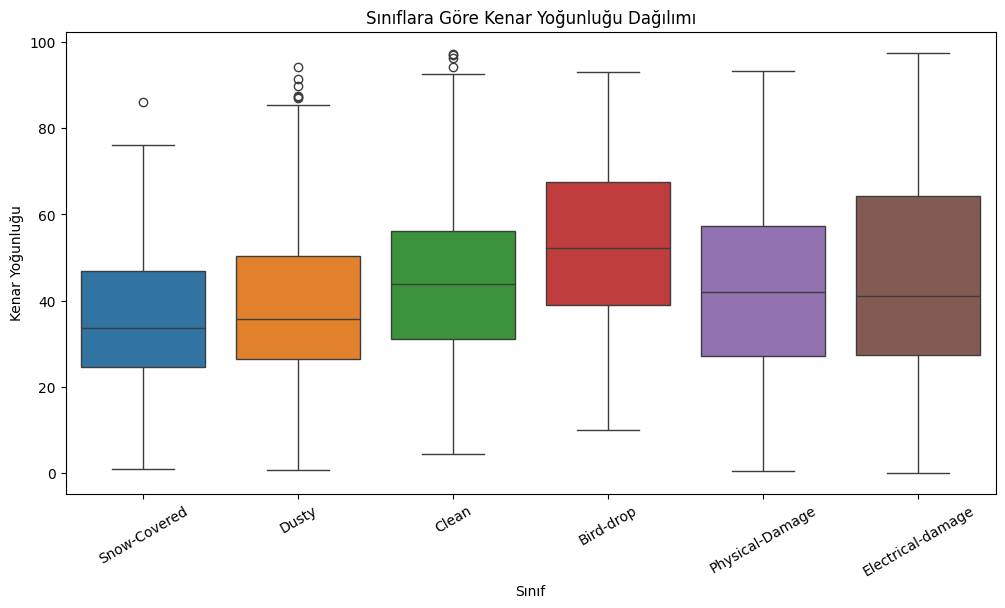

In [88]:
# @title Comparison of Edge Density Across Classes
edge_features = []

for img_path in images:
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(img, 100, 200)

    edge_density = np.sum(edges) / edges.size
    class_name = img_path.split("/")[-2]

    edge_features.append([class_name, edge_density])

df_edges = pd.DataFrame(edge_features, columns=["Class", "Edge Density"])

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_edges, x="Class", y="Edge Density", palette="tab10")
plt.title("Sınıflara Göre Kenar Yoğunluğu Dağılımı")
plt.xlabel("Sınıf")
plt.ylabel("Kenar Yoğunluğu")
plt.xticks(rotation=30)
plt.show()

# **Feature Extraction**

---



<ipython-input-89-8142dae7ce0a>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_hog, x="Class", y="Feature_0", palette="tab10")


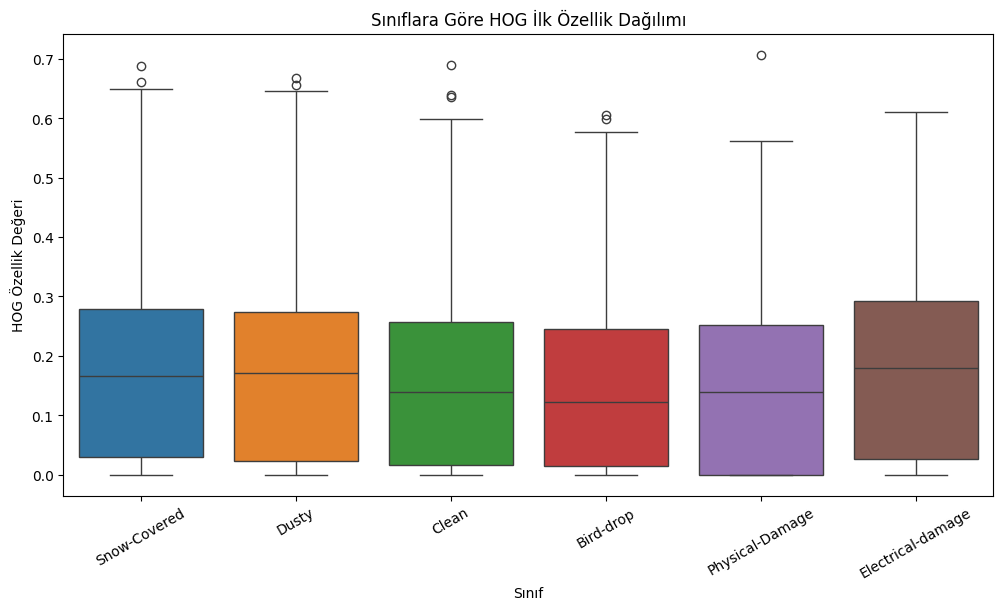

In [89]:
# @title Histogram of Oriented Gradients (HOG) Features by Class
from skimage.feature import hog

hog_features = []

for img_path in images:
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128, 128))

    features, _ = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

    class_name = img_path.split("/")[-2]
    hog_features.append([class_name, *features])

df_hog = pd.DataFrame(hog_features)
df_hog.columns = ["Class"] + [f"Feature_{i}" for i in range(df_hog.shape[1] - 1)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_hog, x="Class", y="Feature_0", palette="tab10")
plt.title("Sınıflara Göre HOG İlk Özellik Dağılımı")
plt.xlabel("Sınıf")
plt.ylabel("HOG Özellik Değeri")
plt.xticks(rotation=30)
plt.show()

<ipython-input-101-41a91b800c46>:6: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20 * np.log(np.abs(fshift))
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
<ipython-input-101-41a91b800c46>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_fft, x="Class", y="Mean_FFT", palette="tab10")


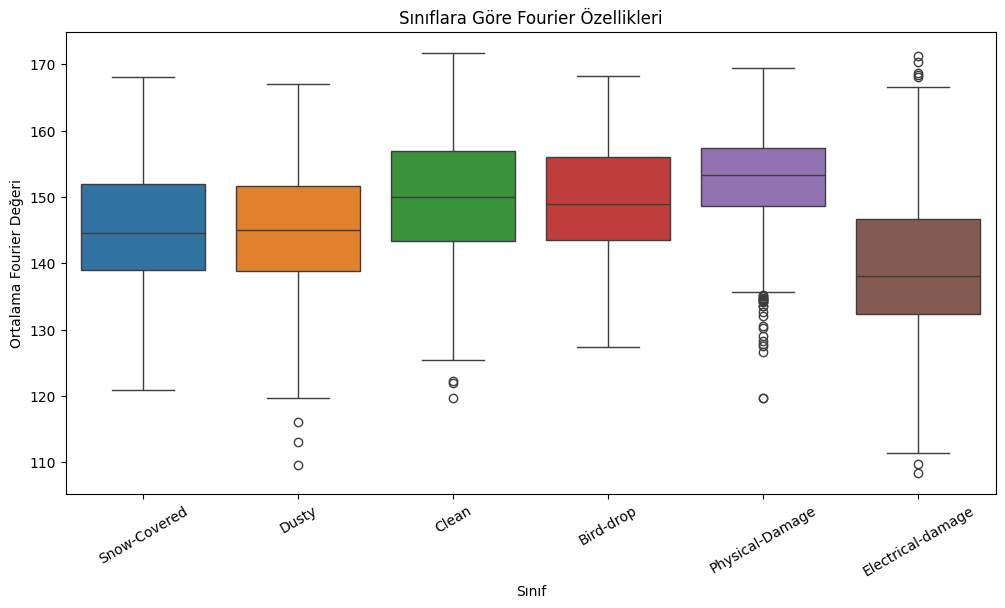

In [101]:
# @title Mean Fourier Transform Features by Class
def compute_fft_features(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128, 128))
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))

    return np.mean(magnitude_spectrum), np.std(magnitude_spectrum)

fft_features = []

for img_path in images:
    mean_fft, std_fft = compute_fft_features(img_path)
    class_name = img_path.split("/")[-2]
    fft_features.append([class_name, mean_fft, std_fft])

df_fft = pd.DataFrame(fft_features, columns=["Class", "Mean_FFT", "Std_FFT"])

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_fft, x="Class", y="Mean_FFT", palette="tab10")
plt.title("Sınıflara Göre Fourier Özellikleri")
plt.xlabel("Sınıf")
plt.ylabel("Ortalama Fourier Değeri")
plt.xticks(rotation=30)
plt.show()

<ipython-input-108-f74ce0b7f3af>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_color, x="Class", y="Mean_R", palette="Reds", ax=axs[0])
<ipython-input-108-f74ce0b7f3af>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_color, x="Class", y="Mean_G", palette="Greens", ax=axs[1])
<ipython-input-108-f74ce0b7f3af>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_color, x="Class", y="Mean_B", palette="Blues", ax=axs[2])


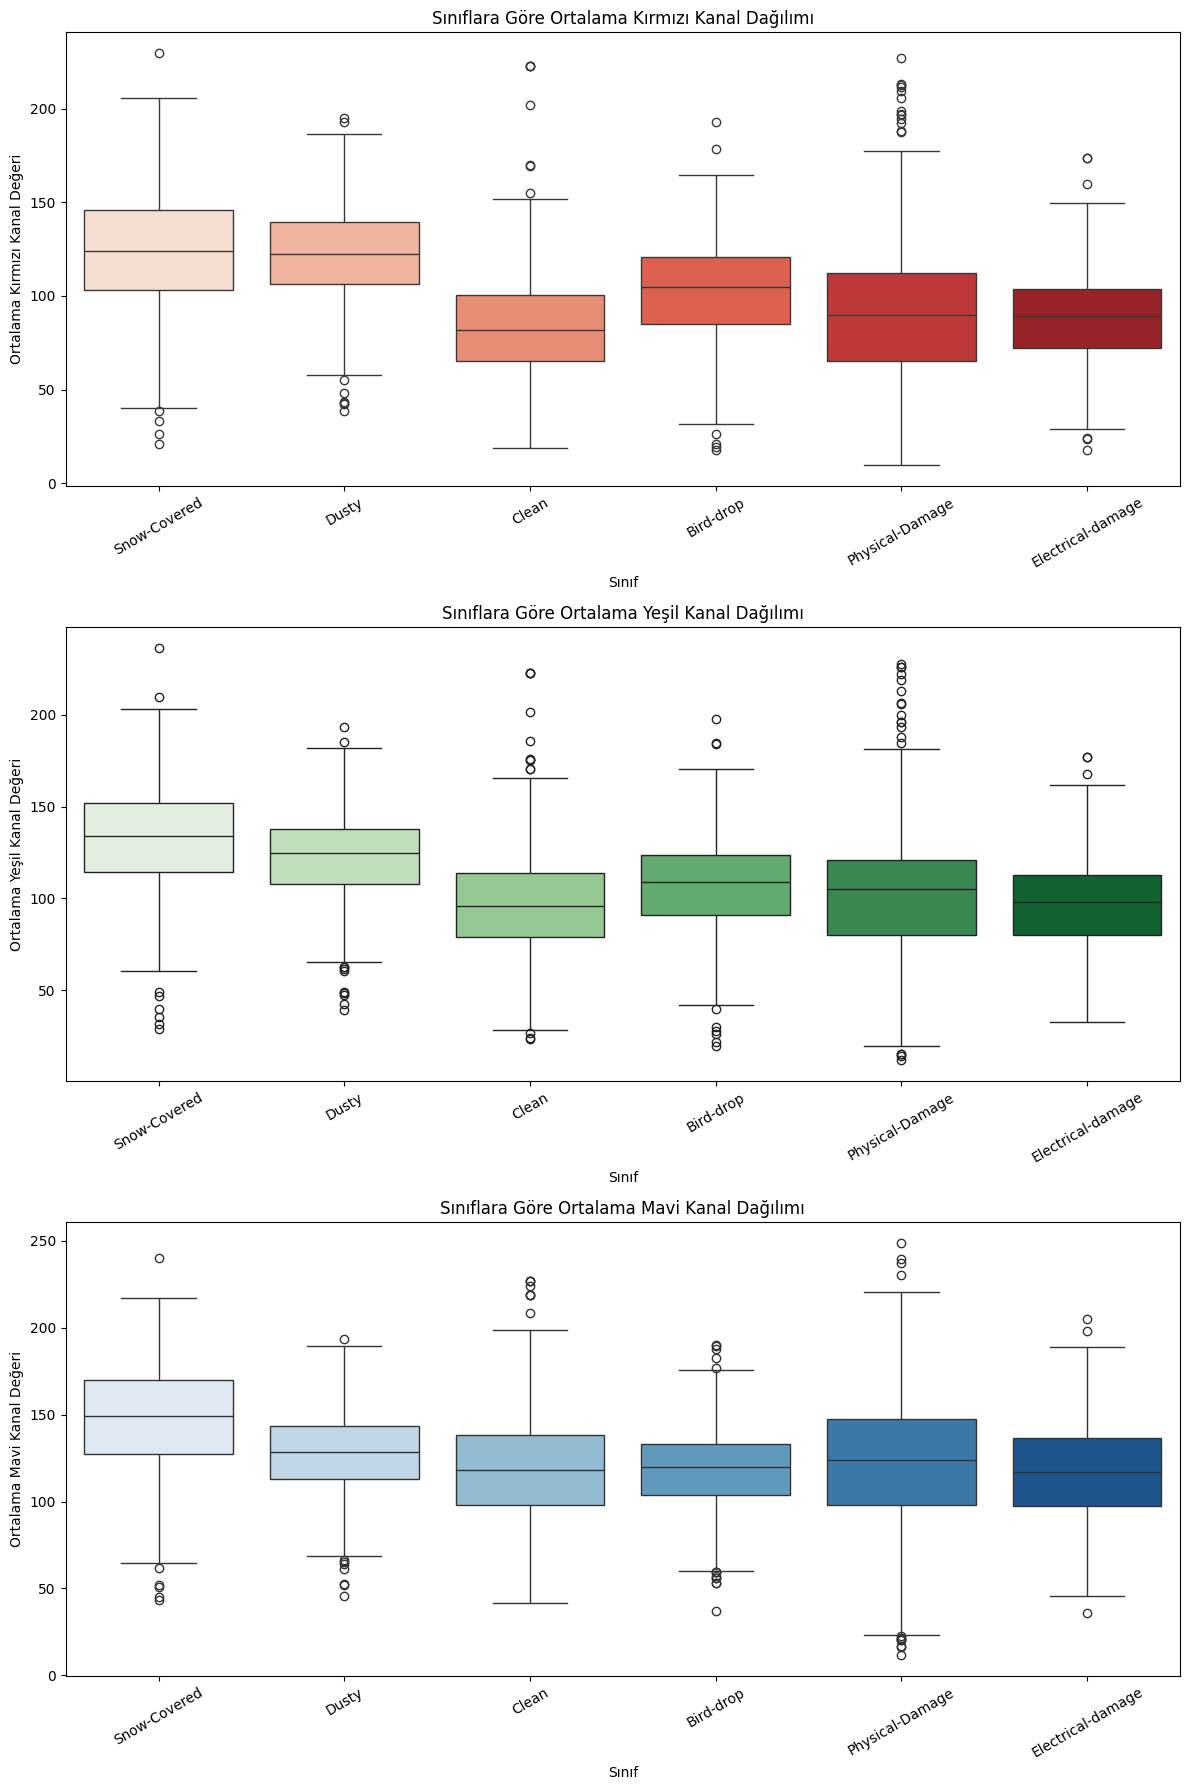

In [108]:
# @title Mean RGB Channel Intensity for Each Class
color_features = []

for img_path in images:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    mean_color = np.mean(img, axis=(0, 1))
    std_color = np.std(img, axis=(0, 1))

    class_name = img_path.split("/")[-2]
    color_features.append([class_name, *mean_color, *std_color])

df_color = pd.DataFrame(color_features, columns=["Class", "Mean_R", "Mean_G", "Mean_B", "Std_R", "Std_G", "Std_B"])

fig, axs = plt.subplots(3, 1, figsize=(12, 18))

sns.boxplot(data=df_color, x="Class", y="Mean_R", palette="Reds", ax=axs[0])
axs[0].set_title("Sınıflara Göre Ortalama Kırmızı Kanal Dağılımı")
axs[0].set_xlabel("Sınıf")
axs[0].set_ylabel("Ortalama Kırmızı Kanal Değeri")
axs[0].tick_params(axis='x', rotation=30)

sns.boxplot(data=df_color, x="Class", y="Mean_G", palette="Greens", ax=axs[1])
axs[1].set_title("Sınıflara Göre Ortalama Yeşil Kanal Dağılımı")
axs[1].set_xlabel("Sınıf")
axs[1].set_ylabel("Ortalama Yeşil Kanal Değeri")
axs[1].tick_params(axis='x', rotation=30)

sns.boxplot(data=df_color, x="Class", y="Mean_B", palette="Blues", ax=axs[2])
axs[2].set_title("Sınıflara Göre Ortalama Mavi Kanal Dağılımı")
axs[2].set_xlabel("Sınıf")
axs[2].set_ylabel("Ortalama Mavi Kanal Değeri")
axs[2].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


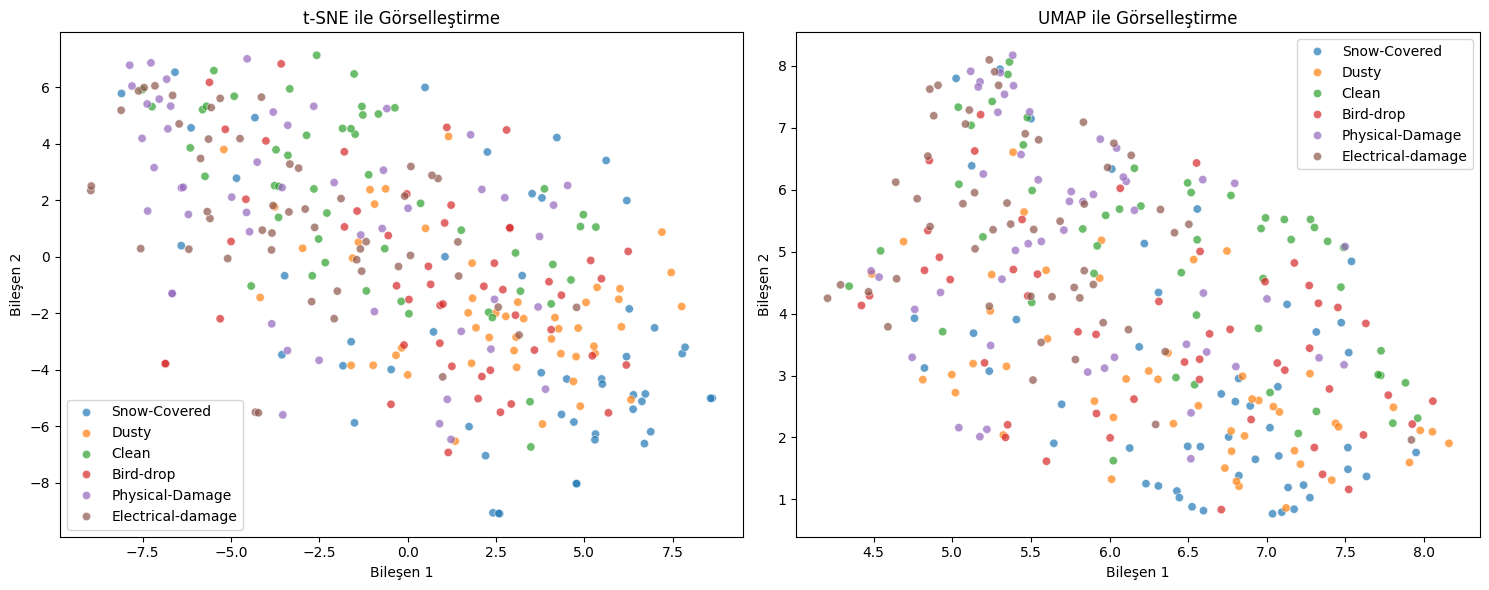

In [106]:
# @title Comparing t-SNE and UMAP: 2D Distribution of Images
from sklearn.manifold import TSNE
import umap
from sklearn.preprocessing import LabelEncoder

def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (224, 224))
    return img.flatten()

image_paths = []
labels = []

for cls in class_names:
    img_paths = glob(os.path.join(data_path, cls, "*.jpg"))
    sampled_paths = random.sample(img_paths, min(len(img_paths), 50))
    image_paths.extend(sampled_paths)
    labels.extend([cls] * len(sampled_paths))
img_data = np.array([preprocess_image(img) for img in image_paths])

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(img_data)

umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(img_data)
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=labels, palette="tab10", alpha=0.7, ax=axs[0])
axs[0].set_title("t-SNE ile Görselleştirme")
axs[0].set_xlabel("Bileşen 1")
axs[0].set_ylabel("Bileşen 2")
axs[0].legend(loc="best")

sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], hue=labels, palette="tab10", alpha=0.7, ax=axs[1])
axs[1].set_title("UMAP ile Görselleştirme")
axs[1].set_xlabel("Bileşen 1")
axs[1].set_ylabel("Bileşen 2")
axs[1].legend(loc="best")

plt.tight_layout()
plt.show()

# **Model Structure**

---

